In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from IDX import IDX
from vn_config import vn_config

In [2]:
import os
result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(vn_config["cached_data_path"]) for f in filenames if os.path.splitext(f)[1] == '.npz']

In [3]:
train_npz = np.load(result[-1], allow_pickle=True)

In [4]:
df = pd.DataFrame(train_npz["X"])

## Visualizing the graph node-wise
Each node contains 2 pairs of coorinates $(x, y), (x_{previous}, y_{previous})$. This graph consists of $N$ small lines ($N$ = number of nodes) where each of these lines $l_i$ connects $(x^i, y^i), (x_{previous}^i, y_{previous}^i)$

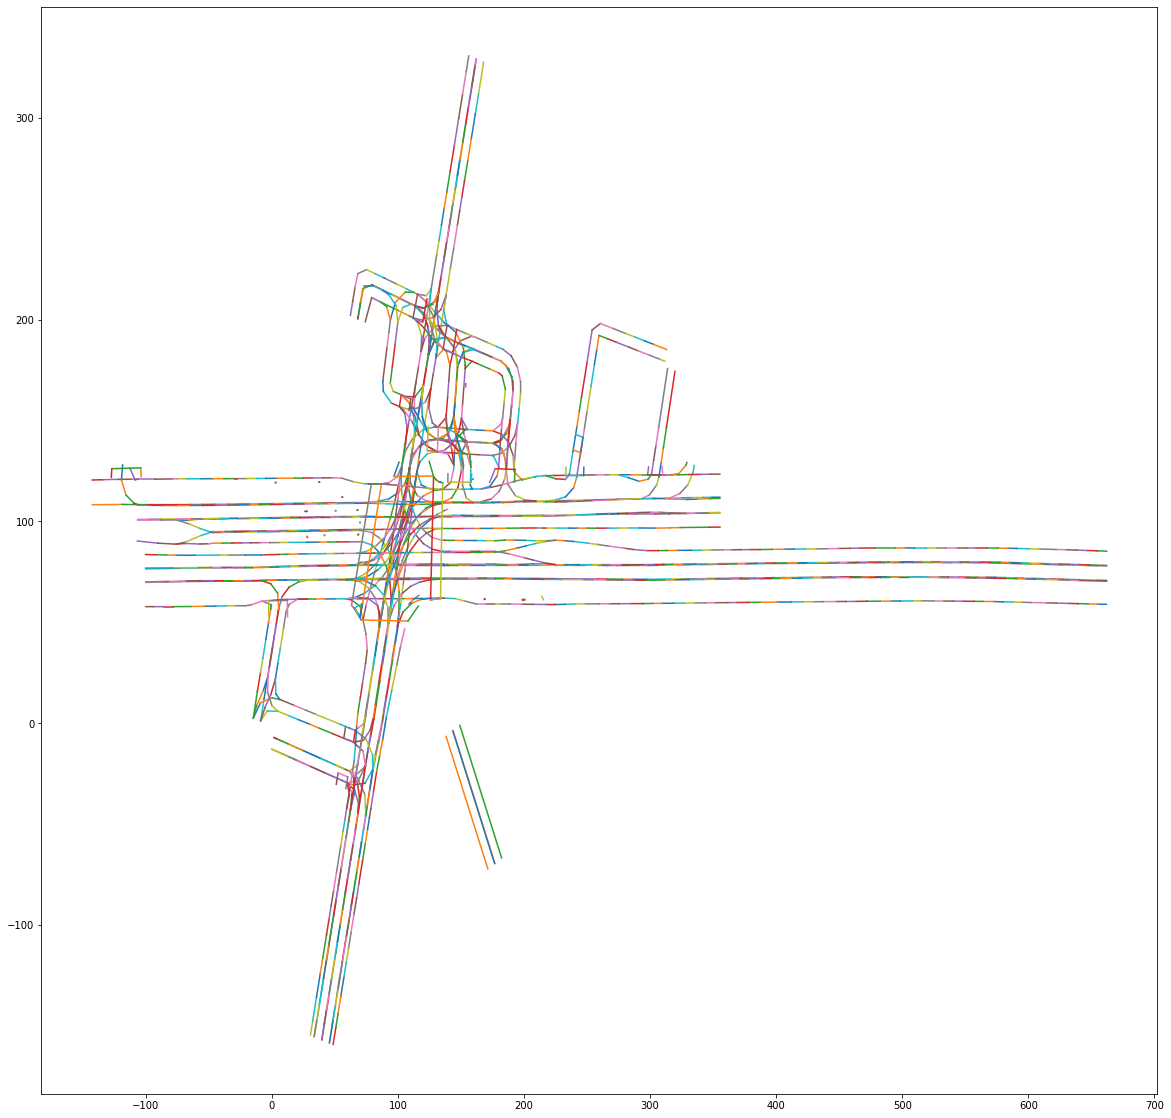

In [5]:
z = train_npz["X"][:, :4]
plt.figure(figsize = (20,20))
for i in range(z.shape[0]):
    j = z[i].reshape(-1, 2)
    if np.linalg.norm(j[1,:]) == 0:
        continue
    plt.plot(j[:, 0], j[:, 1], "-")

## Visualizing the graph line-wise
Here we give the same color for all nodes in same polyline. Thus we can see that seemingly one polyline consists of two or more lines, and sometimes lines intersect. It must be a confusing factor for the model.

(2762, 13)

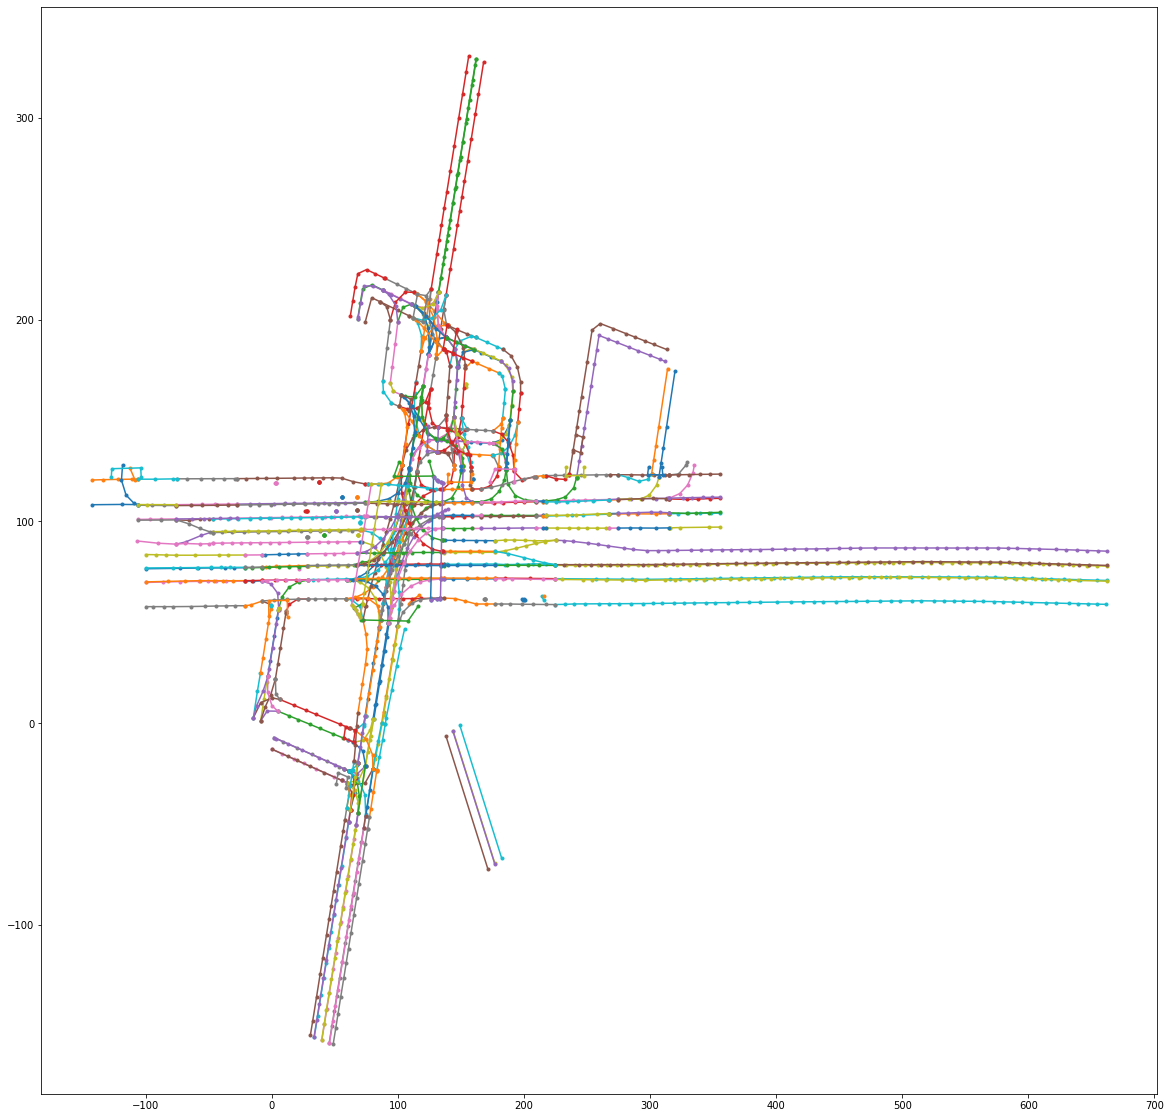

In [6]:
plt.figure(figsize = (20,20))
for pid, pdf in df.groupby(IDX["pindex"]):
    color = "gray"
#     if pid in ego_idx_np:# == ego_idx_np[batch]:
#         color = "green"
#         plt.plot(pdf[0], pdf[1], color = color, linewidth=4)
#         print(pid)
#         continue
    if pdf.iloc[0, IDX["ego"]] == 1:
        color = "lawngreen"
    if pdf.iloc[0, IDX["default"]] == 1:
        color = "black"
    if pdf.iloc[0, IDX["yellow"]] == 1:
        color = "yellow"
    if pdf.iloc[0, IDX["red"]] == 1:
        color = "red"
    if pdf.iloc[0, IDX["green"]] == 1:
        color = "palegreen"
    if pdf.iloc[0, IDX["crosswalk"]] == 1:
        color = "orange"
    if pdf.iloc[0, IDX["other"]] == 1:
        color = "blue"
    plt.plot(pdf[0], pdf[1], "-o", markersize = 3)
# plt.xlim([0,224])
# plt.ylim([0,224])

df.shape

## Visualizing the graph

(2762, 13)

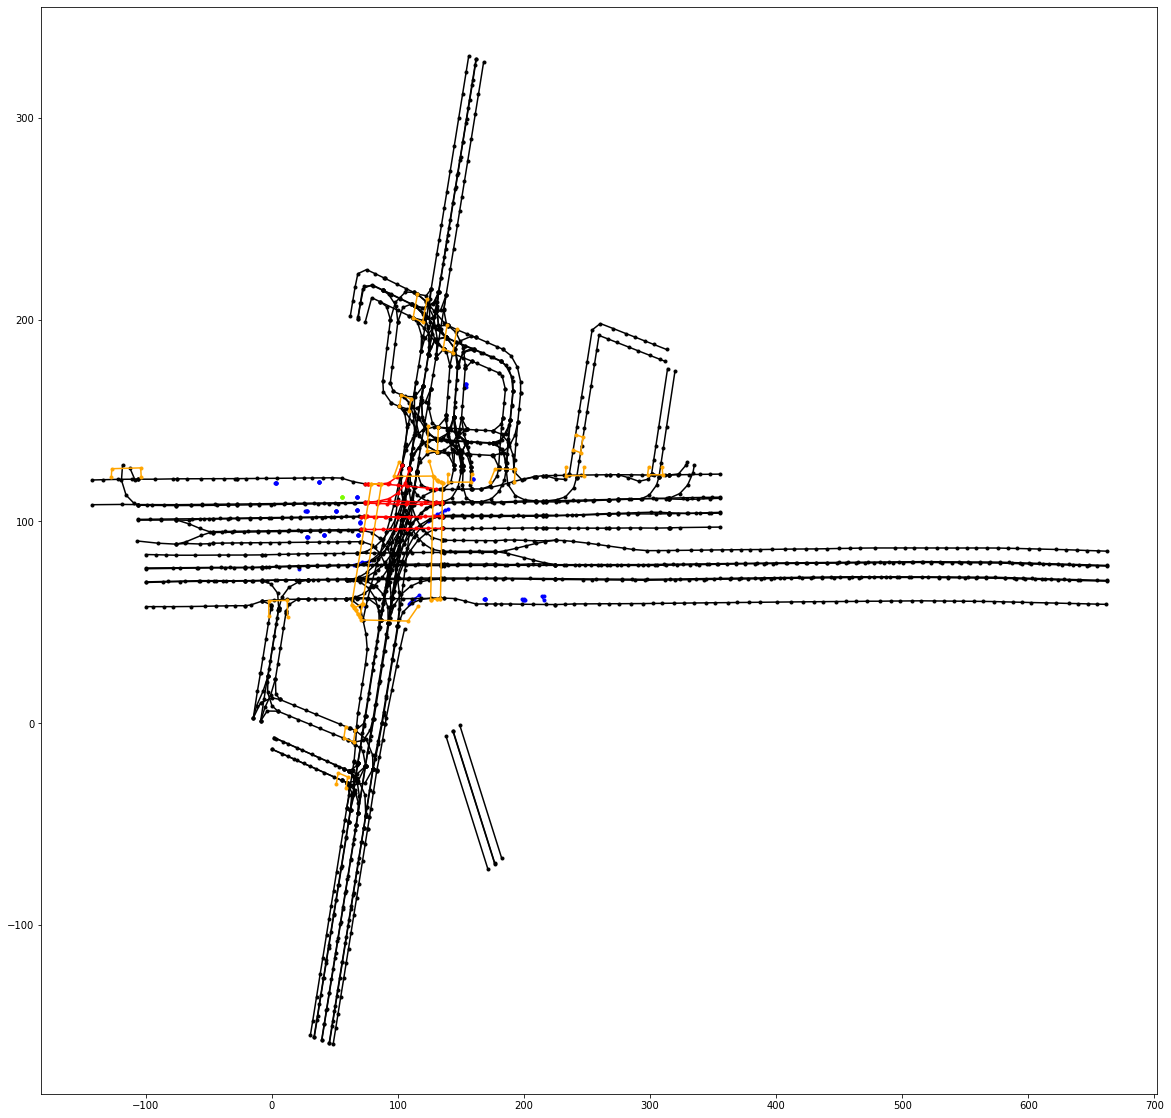

In [7]:
plt.figure(figsize = (20,20))
for pid, pdf in df.groupby(IDX["pindex"]):
    color = "gray"
#     if pid in ego_idx_np:# == ego_idx_np[batch]:
#         color = "green"
#         plt.plot(pdf[0], pdf[1], color = color, linewidth=4)
#         print(pid)
#         continue
    if pdf.iloc[0, IDX["ego"]] == 1:
        color = "lawngreen"
    if pdf.iloc[0, IDX["default"]] == 1:
        color = "black"
    if pdf.iloc[0, IDX["yellow"]] == 1:
        color = "yellow"
    if pdf.iloc[0, IDX["red"]] == 1:
        color = "red"
    if pdf.iloc[0, IDX["green"]] == 1:
        color = "palegreen"
    if pdf.iloc[0, IDX["crosswalk"]] == 1:
        color = "orange"
    if pdf.iloc[0, IDX["other"]] == 1:
        color = "blue"
    plt.plot(pdf[0], pdf[1], "-o", markersize = 3, color = color)
# plt.xlim([0,224])
# plt.ylim([0,224])

df.shape